# Lab 1: Color Spaces

สีในระบบคอมพิวเตอร์ถูกจัดเก็บในรูปของเวกเตอร์บน Color Spaces โดย Color Space มีหลายมาตรฐาน และแต่ละ Color Space ก็มีการจัดเรียงสีที่แตกต่างกัน ทำให้เหมาะกับงานที่แตกต่างกันไป ***โดยในแล็บนี้เราจะลองดูเวกเตอร์ใน Color Spaces ต่าง ๆ ได้แก่ RGB, HSV, และ YCrCb ว่าเวกเตอร์ที่เปลี่ยนไป ให้สีที่แตกต่างกันอย่างไร &nbsp;&nbsp; และเทียบกับเวกเตอร์ของสีนั้น ๆ ใน Color Spaces อื่น ๆ*** &nbsp;&nbsp;ส่วน Color Spaces อื่น ๆ นอกเหนือจากนี้สามารถศึกษาได้จาก References

Color Space ทั้ง 3 อันที่จะทดลองในแล็บนี้ มีลักษณะดังนี้
1. **RGB** อธิบายสีด้วยสัดส่วนการผสมระหว่าง 3 แม่สีของแสง คือ แดง เขียว และน้ำเงิน
2. **HSV** อธิบายสีด้วยค่าสี (Hue) โดยอิงจากค่าความยาวคลื่นในสเปคตรัม ซึ่งไม่เกี่ยวข้องกับเฉดสีหรือโทนสี, ค่าความอิ่มตัวสี (Saturation), และ ค่าความสว่างของแสง (Value)
3. **YCrCb** อธิบายสีด้วย ค่าความสว่าง (Luminance; Y), สีน้ําเงินที่ตัดความสว่างออกไป คำนวณโดย B-Y (Cb), และ สีแดงที่ตัดความสว่างออกไป คำนวณโดย R-Y (Cr) ใช้ในการบีบอัดข้อมูลรูปภาพอย่างวิธี JPEG

<img src="https://www.researchgate.net/publication/323952018/figure/fig2/AS:607349488226304@1521814810246/a-the-RGB-color-space-black-arrows-show-the-three-main-color-dimensions-whose-values.png" alt= "RGB vs HSV" width="600px">
<img src="https://www.ivanandrei.com/wp-content/uploads/2022/06/rgb-ycbcr-1170x658.png" alt= "RGB vs YCrCb" width="600px">

**References**
1. https://learnopencv.com/color-spaces-in-opencv-cpp-python/
2. https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

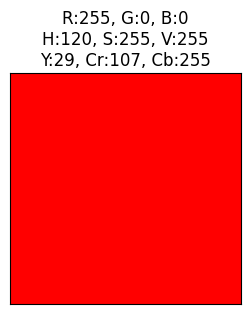

In [ ]:
#@title RGB  { run: "auto" }
R = 255 #@param {type:"slider", min:0, max:255, step:1}
G = 0 #@param {type:"slider", min:0, max:255, step:1}
B = 0 #@param {type:"slider", min:0, max:255, step:1}

rgb_col = np.uint8([[[R, G, B]]])
hsv_col = cv2.cvtColor(rgb_col, cv2.COLOR_BGR2HSV).squeeze()
ycrcb_col = cv2.cvtColor(rgb_col, cv2.COLOR_BGR2YCrCb).squeeze()

img = np.ones((16,16, 1), 'uint8')

plt.figure(figsize=(3,3))
plt.imshow(img * rgb_col)
plt.xticks([])
plt.yticks([])
plt.title(f"R:{R}, G:{G}, B:{B}\n" + 
          f"H:{hsv_col[0]}, S:{hsv_col[1]}, V:{hsv_col[2]}\n" +
          f"Y:{ycrcb_col[0]}, Cr:{ycrcb_col[1]}, Cb:{ycrcb_col[2]}")
plt.show()

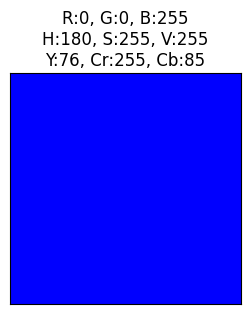

In [ ]:
#@title HSV  { run: "auto" }
H = 180 #@param {type:"slider", min:0, max:180, step:1}
S = 255 #@param {type:"slider", min:0, max:255, step:1}
V = 255 #@param {type:"slider", min:0, max:255, step:1}

hsv_col = np.uint8([[[H, S, V]]])
rgb_col = cv2.cvtColor(hsv_col, cv2.COLOR_HSV2BGR)
ycrcb_col = cv2.cvtColor(rgb_col, cv2.COLOR_BGR2YCrCb).squeeze()

img = np.ones((16,16, 1), 'uint8')

plt.figure(figsize=(3,3))
plt.imshow(img * rgb_col)
plt.xticks([])
plt.yticks([])
hsv_col = hsv_col.squeeze()
rgb_col = rgb_col.squeeze()
plt.title(f"R:{rgb_col[0]}, G:{rgb_col[1]}, B:{rgb_col[2]}\n" + 
          f"H:{hsv_col[0]}, S:{hsv_col[1]}, V:{hsv_col[2]}\n" +
          f"Y:{ycrcb_col[0]}, Cr:{ycrcb_col[1]}, Cb:{ycrcb_col[2]}")
plt.show()

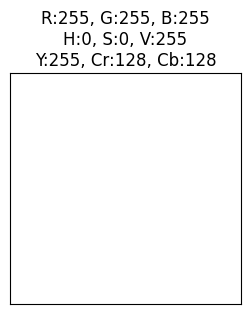

In [ ]:
#@title YCrCb  { run: "auto" }
Y = 255 #@param {type:"slider", min:0, max:255, step:1}
Cr = 128 #@param {type:"slider", min:0, max:255, step:1}
Cb = 128 #@param {type:"slider", min:0, max:255, step:1}

ycrcb_col = np.uint8([[[Y, Cr, Cb]]])
rgb_col = cv2.cvtColor(ycrcb_col, cv2.COLOR_YCrCb2BGR)
hsv_col = cv2.cvtColor(rgb_col, cv2.COLOR_BGR2HSV).squeeze()

img = np.ones((16,16, 1), 'uint8')

plt.figure(figsize=(3,3))
plt.imshow(img * rgb_col)
plt.xticks([])
plt.yticks([])
ycrcb_col = ycrcb_col.squeeze()
rgb_col = rgb_col.squeeze()
plt.title(f"R:{rgb_col[0]}, G:{rgb_col[1]}, B:{rgb_col[2]}\n" + 
          f"H:{hsv_col[0]}, S:{hsv_col[1]}, V:{hsv_col[2]}\n" +
          f"Y:{ycrcb_col[0]}, Cr:{ycrcb_col[1]}, Cb:{ycrcb_col[2]}")
plt.show()

----